In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
wine_red = pd.read_csv("winequality-red.csv", sep=';')
wine_white = pd.read_csv("winequality-white.csv", sep=';')
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_red['wine_type'] = 'red'
wine_white['wine_type'] = 'white'

wine_red['quality_label'] = wine_red['quality'].\
       apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')
wine_white['quality_label'] = wine_white['quality'].\
       apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')

In [7]:
# merge data
wines = pd.concat([wine_red, wine_white], axis=0)

# re-shuffle records
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines['quality_label'] = wines['quality_label'].astype('category')

In [8]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


## descriptive statistics

In [9]:
rs = round(wine_red.describe(), 2)
ws = round(wine_white.describe(), 2)
cats = ['residual sugar', 'total sulfur dioxide', 'quality']
pd.concat([rs[cats], ws[cats]], axis=1, keys=['red wine', 'white wine'])

red wine                                   white wine  \
      residual sugar total sulfur dioxide  quality residual sugar   
count        1599.00              1599.00  1599.00        4898.00   
mean            2.54                46.47     5.64           6.39   
std             1.41                32.90     0.81           5.07   
min             0.90                 6.00     3.00           0.60   
25%             1.90                22.00     5.00           1.70   
50%             2.20                38.00     6.00           5.20   
75%             2.60                62.00     6.00           9.90   
max            15.50               289.00     8.00          65.80   

                                     
      total sulfur dioxide  quality  
count              4898.00  4898.00  
mean                138.36     5.88  
std                  42.50     0.89  
min                   9.00     3.00  
25%                 108.00     5.00  
50%                 134.00     6.00  
75%                 167.00     6.00  
max                 440.00     9.00

In [10]:
cat =['alcohol', 'volatile acidity', 'pH', 'quality']
lm = round(wines[wines['quality_label']=='low'][cat].describe(), 2)
ms = round(wines[wines['quality_label']=='medium'][cat].describe(), 2)
hi = round(wines[wines['quality_label']=='high'][cat].describe(), 2)
pd.concat([lm, ms, hi], axis=1, keys=['low quality', 'medium quality', 'high quality'])

low quality                                    medium quality  \
          alcohol volatile acidity       pH  quality        alcohol   
count     2384.00          2384.00  2384.00  2384.00        3915.00   
mean         9.87             0.40     3.21     4.88          10.81   
std          0.84             0.19     0.16     0.36           1.20   
min          8.00             0.10     2.74     3.00           8.40   
25%          9.30             0.26     3.11     5.00           9.80   
50%          9.60             0.34     3.20     5.00          10.80   
75%         10.40             0.50     3.31     5.00          11.70   
max         14.90             1.58     3.90     5.00          14.20   

                                         high quality                   \
      volatile acidity       pH  quality      alcohol volatile acidity   
count          3915.00  3915.00  3915.00       198.00           198.00   
mean              0.31     3.22     6.28        11.69             0.29   
std               0.14     0.16     0.45         1.27             0.12   
min               0.08     2.72     6.00         8.50             0.12   
25%               0.21     3.11     6.00        11.00             0.21   
50%               0.27     3.21     6.00        12.00             0.28   
75%               0.36     3.33     7.00        12.60             0.35   
max               1.04     4.01     7.00        14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

## inferential statistics

ANOVA - analysis of variance

In [11]:
from scipy import stats
F, p = stats.f_oneway(wines[wines['quality_label']=='low']['alcohol'],
                   wines[wines['quality_label']=='medium']['alcohol'],
                   wines[wines['quality_label']=='high']['alcohol'],)
print('alcohol: ', F, p)

F, p = stats.f_oneway(wines[wines['quality_label']=='low']['pH'],
                   wines[wines['quality_label']=='medium']['pH'],
                   wines[wines['quality_label']=='high']['pH'],)
print('pH: ', F, p)

alcohol:  673.074534723 2.27153374506e-266
pH:  1.23638608035 0.290500277977


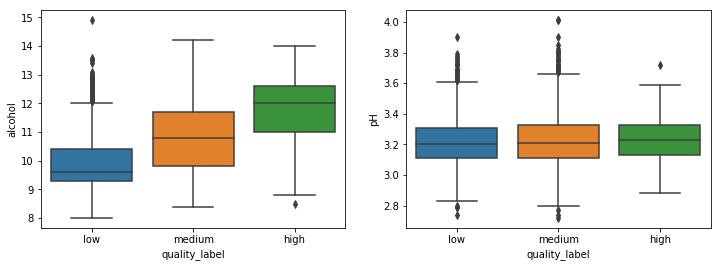

In [12]:
order = ['low', 'medium', 'high']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x='quality_label', y='alcohol', data=wines, ax=ax[0], order=order)
sns.boxplot(x='quality_label', y='pH', data=wines, ax=ax[1], order=order)

### univariate analysis

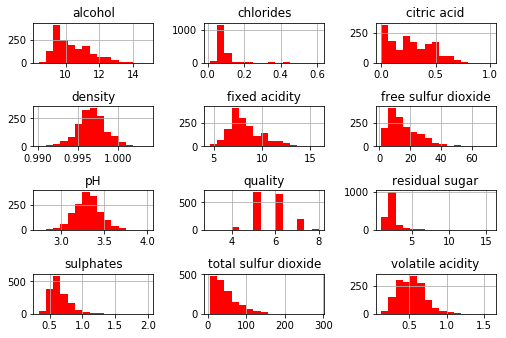

In [13]:
wine_red.hist(bins=15, color='red')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

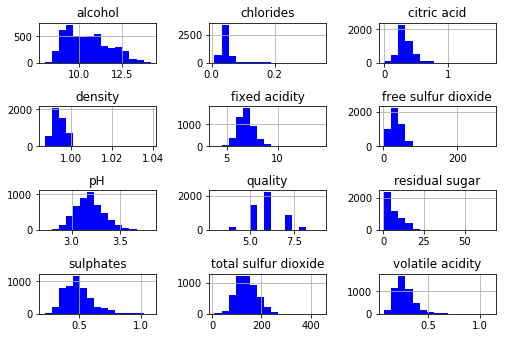

In [14]:
wine_white.hist(bins=15, color='blue')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### multivariate analysis

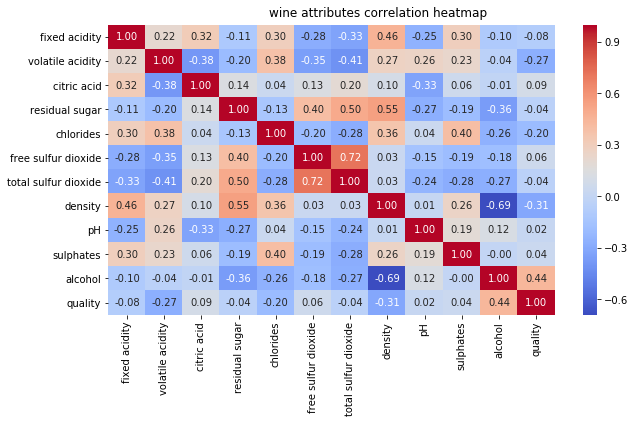

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
corr = wines.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f')
fig.subplots_adjust(top=0.93)
t = fig.suptitle('wine attributes correlation heatmap', fontsize=12)

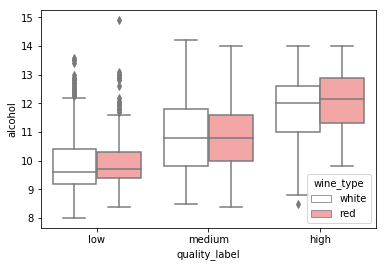

In [16]:
sns.boxplot(x='quality_label', y='alcohol', data=wines, hue='wine_type',
           palette={'red':'#FF9999', 'white':'white'},
           order=['low', 'medium', 'high'])

## predictive modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression

In [19]:
wtp_features = wines.iloc[:, :-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])

wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features,
                                wtp_class_labels, test_size=0.3, random_state=42)

In [20]:
# define the scaler
wtp_scaler = StandardScaler().fit(wtp_train_X)
wtp_train_SX = wtp_scaler.transform(wtp_train_X)
wtp_test_SX = wtp_scaler.transform(wtp_test_X)

In [21]:
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

wtp_lr_pred = wtp_lr.predict(wtp_test_SX)

matrix = confusion_matrix(wtp_test_y, wtp_lr_pred)
print(matrix)

report =  classification_report(wtp_test_y, wtp_lr_pred)
print(report)

[[ 463    7]
 [   8 1472]]
             precision    recall  f1-score   support

        red       0.98      0.99      0.98       470
      white       1.00      0.99      0.99      1480

avg / total       0.99      0.99      0.99      1950



## deep learning

In [24]:
le = LabelEncoder()
le.fit(wtp_train_y)
wtp_train_ey = le.transform(wtp_train_y)
wtp_test_ey = le.transform(wtp_test_y)

In [25]:
print(wtp_train_ey[:5])
print(wtp_train_y[:5])

[1 0 1 0 0]
['white' 'red' 'white' 'red' 'red']


In [26]:
from keras.models import Sequential
from keras.layers import Dense

wtp_dnn_model = Sequential()
wtp_dnn_model.add(Dense(16, activation='relu', input_shape=(11, )))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(1, activation='sigmoid'))

wtp_dnn_model.compile(loss='binary_crossentropy', 
                      optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [28]:
history = wtp_dnn_model.fit(wtp_train_SX, wtp_train_ey,
                           epochs=5, batch_size=5, 
                           shuffle=True, validation_split=0.1, verbose=1)

Train on 4092 samples, validate on 455 samples
Epoch 1/5
4092/4092 [==============================] - 5s 1ms/step - loss: 0.0198 - acc: 0.9961 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 2/5
4092/4092 [==============================] - 3s 841us/step - loss: 0.0182 - acc: 0.9966 - val_loss: 0.0113 - val_acc: 0.9956
Epoch 3/5
4092/4092 [==============================] - 3s 677us/step - loss: 0.0179 - acc: 0.9963 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 4/5
4092/4092 [==============================] - 2s 596us/step - loss: 0.0166 - acc: 0.9966 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 5/5
4092/4092 [==============================] - 2s 565us/step - loss: 0.0146 - acc: 0.9968 - val_loss: 0.0026 - val_acc: 1.0000


In [29]:
wtp_dnn_pred = np.where(wtp_dnn_model.predict(wtp_test_SX)>0.5, 1, 0)
wtp_dnn_predictions = le.inverse_transform(wtp_dnn_pred)

matrix_dnn = confusion_matrix(wtp_test_ey, wtp_dnn_pred)
print(matrix_dnn)

report_dnn =  classification_report(wtp_test_ey, wtp_dnn_pred)
print(report_dnn)

[[ 462    8]
 [   7 1473]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       470
          1       0.99      1.00      0.99      1480

avg / total       0.99      0.99      0.99      1950



[11/11] features ████████████████████ Time elapsed: 0 seconds

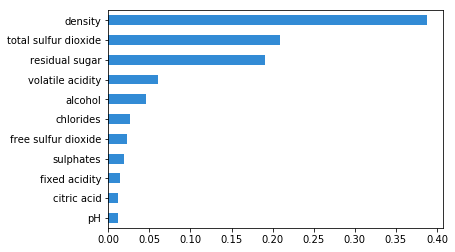

In [30]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

wtp_interpreter = Interpretation(wtp_test_SX, 
                                 feature_names=wtp_features.columns)
wtp_im_model = InMemoryModel(wtp_lr.predict_proba, examples=wtp_train_SX,
                            target_names=wtp_lr.classes_)
plots = wtp_interpreter.feature_importance.\
plot_feature_importance(wtp_im_model, ascending=False)

## predicting wine quality

In [27]:
wqp_features = wines.iloc[:, :-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(
                               wqp_features, wqp_class_labels, 
                               test_size=0.3, random_state=42)

from collections import Counter
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('FEatures:', wqp_feature_names)

Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
FEatures: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [28]:
wqp_ss = StandardScaler().fit(wqp_train_X)
wqp_train_SX = wqp_ss.transform(wqp_train_X)
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [29]:
from sklearn.tree import DecisionTreeClassifier

# train the model
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)


In [30]:
wqp_dt_pred = wqp_dt.predict(wqp_test_SX)

matrix = confusion_matrix(wqp_test_y, wqp_dt_pred)
print(matrix)

report = classification_report(wqp_test_y, wqp_dt_pred)
print(report)

[[ 16   5  33]
 [  4 485 229]
 [ 41 218 919]]
             precision    recall  f1-score   support

       high       0.26      0.30      0.28        54
        low       0.69      0.68      0.68       718
     medium       0.78      0.78      0.78      1178

avg / total       0.73      0.73      0.73      1950



In [31]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
print(wqp_dt_feature_importances)

print(wqp_feature_names)

wqp_import = pd.DataFrame({'features':wqp_feature_names,
                           'score':wqp_dt_feature_importances})
wqp_import

[ 0.05723795  0.11444789  0.07626582  0.06844474  0.08320231  0.07210011
  0.0978642   0.08594361  0.07589713  0.07565583  0.19294041]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,features,score
0,fixed acidity,0.057238
1,volatile acidity,0.114448
2,citric acid,0.076266
3,residual sugar,0.068445
4,chlorides,0.083202
5,free sulfur dioxide,0.072100
6,total sulfur dioxide,0.097864
7,density,0.085944
8,pH,0.075897
9,sulphates,0.075656


In [32]:
wqp_import.sort_values("score", ascending=False, inplace=True)

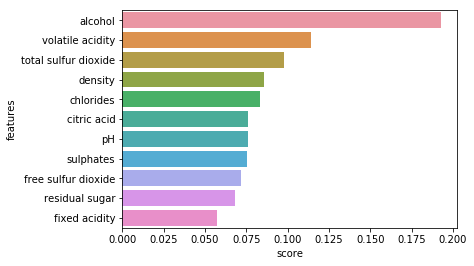

In [33]:
sns.barplot(y="features", x='score', data=wqp_import)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# train the model
wqp_rf = RandomForestClassifier(max_features='auto', 
                                n_estimators=200,
                                random_state=42)
wqp_rf.fit(wqp_train_SX, wqp_train_y)

#preidct 
wqp_rt_predictions = wqp_rf.predict(wqp_test_SX)

matrix = confusion_matrix(wqp_test_y, wqp_rt_predictions)
print(matrix)

report = classification_report(wqp_test_y, wqp_rt_predictions)
print(report)

[[  15    0   39]
 [   0  522  196]
 [   2  132 1044]]
             precision    recall  f1-score   support

       high       0.88      0.28      0.42        54
        low       0.80      0.73      0.76       718
     medium       0.82      0.89      0.85      1178

avg / total       0.81      0.81      0.81      1950



### ensemble method - RF

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 200, 500],
    'max_features': ['auto', 'log2']
}

wqp_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                      cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

wqp_clf.fit(wqp_train_SX, wqp_train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 200, 500], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [41]:
print(wqp_clf.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


### XGBoost

In [178]:
import xgboost as xgb

wqp_xgb_model = xgb.XGBClassifier(seed=42, max_depth=10, learning_ratio=0.3,
                                n_estimatiors=100)

wqp_xgb_model.fit(wqp_train_SX, wqp_train_y)

wqp_xgb_predictions = wqp_xgb_model.predict(wqp_test_SX)

matrix = confusion_matrix(wqp_test_y, wqp_xgb_predictions)
print(matrix)

report = classification_report(wqp_test_y, wqp_xgb_predictions)
print(report)

[[  14    3   37]
 [   0  519  199]
 [   0  152 1026]]
             precision    recall  f1-score   support

       high       1.00      0.26      0.41        54
        low       0.77      0.72      0.75       718
     medium       0.81      0.87      0.84      1178

avg / total       0.80      0.80      0.79      1950

